In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
turnstile_data_source = 'http://web.mta.info/developers/data/nyct/turnstile/'
    
turnstile_filename1 = 'turnstile_190713.txt'
#st = turnstile_data_source + '/' + turnstile_filename1

df = pd.read_csv(turnstile_data_source + '/' + turnstile_filename1)

In [3]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [4]:
# rename columns since the last column, 'EXITS', contains trailing whitespace
df.columns = df.columns.str.replace(r'\s+', '')

# Use domain knowledge to select subway stops in and near the Flatiron district where there are many tech companies
df_23st = df[df['STATION'].str.contains('23 ST')]

# Four subway stops either in or near the Flatiron district
flatiron = df_23st[df_23st['LINENAME'].str.contains('NRW')]
gramercy = df_23st[df_23st['LINENAME'].str.contains('6')]
east_chelsea = df_23st[df_23st['LINENAME'].str.contains('F')]
union_sq = df[df['STATION'].str.contains('14 ST-UNION SQ')]

Examine exits at different times in at the FI stop.

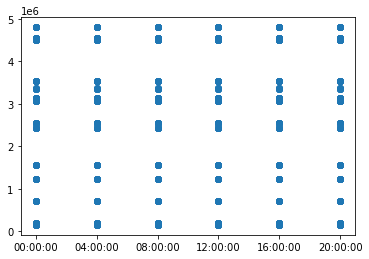

In [5]:
plt.scatter(x=flatiron['TIME'], y=(flatiron['EXITS']).astype(int))

This is not very helpful because times are in four-hour increments. 

To verify, let's sample the data and look at the TIME column: 16, 12, 0, 8, etc.

In [6]:
flatiron.sample(200)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
4144,A030,R083,01-03-02,23 ST,NRW,BMT,07/08/2019,20:00:00,REGULAR,11014134,3357292
4029,A030,R083,01-00-02,23 ST,NRW,BMT,07/10/2019,16:00:00,REGULAR,5213960,2427694
4349,A031,R083,00-00-02,23 ST,NRW,BMT,07/08/2019,00:00:00,REGULAR,6584982,3525501
3963,A030,R083,01-00-01,23 ST,NRW,BMT,07/06/2019,16:00:00,REGULAR,6927489,2542889
4093,A030,R083,01-03-01,23 ST,NRW,BMT,07/07/2019,08:00:00,REGULAR,9961933,3059063
...,...,...,...,...,...,...,...,...,...,...,...
4060,A030,R083,01-03-00,23 ST,NRW,BMT,07/08/2019,20:00:00,REGULAR,6520871,3138137
4023,A030,R083,01-00-02,23 ST,NRW,BMT,07/09/2019,16:00:00,REGULAR,5212799,2427207
3921,A030,R083,01-00-00,23 ST,NRW,BMT,07/06/2019,16:00:00,REGULAR,103161,148016
4440,A031,R083,00-03-01,23 ST,NRW,BMT,07/09/2019,04:00:00,REGULAR,4079242,4502982


Could do a groupby to aggregate the average or sum of entries at each time of day. 

What about by days of the week?

What about by days of the week?

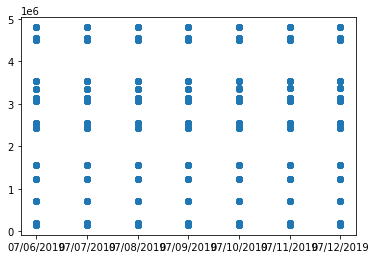

In [7]:
plt.scatter(x=flatiron['DATE'], y=(flatiron['EXITS']).astype(int))

I don't think I understand yet what the 'EXITS' column really means yet.  Even within the same week at the same time interval 

there are many datapoints.

To go further, we probably need to review the 'codebook' for this dataset. Otherwise we can end up with a garbage-in analysis

Meanwhile, what about the zip code of stations? We'll need to merge this with the turnstile data if we want to 

identify stops that that are higher-income neighborhoods, by joining (merging) with a demographics/census dataset

In [4]:
stations = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

In [5]:
stations.sample(10)

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Notes
127,128,630,L17,BMT,Canarsie,Myrtle-Wyckoff Avs,Bk,L,Subway,40.699814,-73.911586,Manhattan,Canarsie - Rockaway Parkway,1,NaN
161,162,162,A25,IND,8th Av - Fulton St,50 St,M,C E,Subway,40.762456,-73.985984,Uptown - Queens,Downtown & Brooklyn,2,Downtown only
6,7,613,R11,BMT,Astoria,Lexington Av/59 St,M,N W R,Subway,40.762660,-73.967258,Queens,Downtown & Brooklyn,0,NaN
305,305,305,115,IRT,Broadway - 7Av,137 St-City College,M,1,Subway,40.822008,-73.953676,Uptown & The Bronx,Downtown,0,NaN
464,463,463,720,IRT,Flushing,Hunters Point Av,Q,7,Subway,40.742216,-73.948916,Flushing,Manhattan,0,NaN
328,328,328,138,IRT,Broadway - 7Av,WTC Cortlandt,M,1,Subway,40.711835,-74.012188,Uptown & The Bronx,Downtown,1,NaN
292,292,292,G36,IND,Crosstown,Fulton St,Bk,G,Subway,40.687119,-73.975375,Queens,Church Av,0,NaN
466,465,610,723,IRT,Flushing,Grand Central-42 St,M,7,Subway,40.751431,-73.976041,Queens,34 St - Hudson Yards,1,NaN
492,518,518,S14,SIR,Staten Island,Pleasant Plains,SI,SIR,Embankment,40.522410,-74.217847,St George,Tottenville,0,NaN
99,100,100,M14,BMT,Jamaica,Hewes St,Bk,J M,Elevated,40.706870,-73.953431,Jamaica - Middle Village,Manhattan,0,NaN


Whereas the stop names in the turnstile dataset were all caps, these are in title case. 

Who knows if truly corresponding names are used for each station?

As a preliminary step to finding out, lets convert that columns to upper 

In [10]:
stations['Stop Name'] = stations['Stop Name'].str.upper() 

In [11]:
# sanity check
stations.sample(5)

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Notes
426,426,426,213,IRT,Lenox - White Plains Rd,E 180 ST,Bx,2 5,Elevated,40.841894,-73.873488,Wakefield - Eastchester,Manhattan,1,NaN
436,436,436,301,IRT,Lenox - White Plains Rd,HARLEM-148 ST,M,3,Subway,40.823880,-73.936470,NaN,Downtown & Brooklyn,0,NaN
429,429,429,216,IRT,Lenox - White Plains Rd,FREEMAN ST,Bx,2 5,Elevated,40.829993,-73.891865,Wakefield - Eastchester,Manhattan,0,NaN
278,278,278,G05,IND,Queens - Archer,JAMAICA CENTER-PARSONS/ARCHER,Q,E J Z,Subway,40.702147,-73.801109,NaN,Manhattan,1,NaN
29,30,30,R34,BMT,4th Av,PROSPECT AV,Bk,R,Subway,40.665414,-73.992872,Manhattan,Bay Ridge - 95 St,0,NaN


In [12]:
stations.columns

Index(['Station ID', 'Complex ID', 'GTFS Stop ID', 'Division', 'Line',
       'Stop Name', 'Borough', 'Daytime Routes', 'Structure', 'GTFS Latitude',
       'GTFS Longitude', 'North Direction Label', 'South Direction Label',
       'ADA', 'ADA Notes'],
      dtype='object')

In [9]:
stations['Line'].value_counts

<bound method IndexOpsMixin.value_counts of 0            Astoria
1            Astoria
2            Astoria
3            Astoria
4            Astoria
           ...      
491    Staten Island
492    Staten Island
493    Staten Island
494    Staten Island
495    Staten Island
Name: Line, Length: 496, dtype: object>

In [13]:
df.merge(stations, left_on="STATION", right_on="Stop Name")

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,...,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Notes
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/06/2019,00:00:00,REGULAR,7124325,...,59 ST,Bk,N R,Subway,40.641362,-74.017881,Manhattan,Coney Island - Bay Ridge,0,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/06/2019,00:00:00,REGULAR,7124325,...,59 ST,M,4 5 6,Subway,40.762526,-73.967967,Uptown & The Bronx,Downtown & Brooklyn,0,NaN
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/06/2019,04:00:00,REGULAR,7124336,...,59 ST,Bk,N R,Subway,40.641362,-74.017881,Manhattan,Coney Island - Bay Ridge,0,NaN
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/06/2019,04:00:00,REGULAR,7124336,...,59 ST,M,4 5 6,Subway,40.762526,-73.967967,Uptown & The Bronx,Downtown & Brooklyn,0,NaN
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/06/2019,08:00:00,REGULAR,7124350,...,59 ST,Bk,N R,Subway,40.641362,-74.017881,Manhattan,Coney Island - Bay Ridge,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269429,S102,R165,00-05-01,TOMPKINSVILLE,1,SRT,07/12/2019,06:00:00,REGULAR,403,...,TOMPKINSVILLE,SI,SIR,At Grade,40.636949,-74.074835,St George,Tottenville,0,NaN
269430,S102,R165,00-05-01,TOMPKINSVILLE,1,SRT,07/12/2019,10:00:00,REGULAR,403,...,TOMPKINSVILLE,SI,SIR,At Grade,40.636949,-74.074835,St George,Tottenville,0,NaN
269431,S102,R165,00-05-01,TOMPKINSVILLE,1,SRT,07/12/2019,14:00:00,REGULAR,403,...,TOMPKINSVILLE,SI,SIR,At Grade,40.636949,-74.074835,St George,Tottenville,0,NaN
269432,S102,R165,00-05-01,TOMPKINSVILLE,1,SRT,07/12/2019,18:00:00,REGULAR,404,...,TOMPKINSVILLE,SI,SIR,At Grade,40.636949,-74.074835,St George,Tottenville,0,NaN


For this to be useful regarding income levels in neighborhoods (which will probably exists by zip code), 

we'd have to merge this station we'd have to use library that gets zip code from lat and longitude

I believe the one to use is probably geopy: 
[geopy](https://geopy.readthedocs.io/en/stable/)

These might or not be helpful:

[income by zip](https://www.incomebyzipcode.com/newyork)

[open data nyc](https://opendata.cityofnewyork.us/)    